In [1]:
#SVM

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
# load data as dataframe
df = pd.read_csv('../datasets/kr-vs-k.csv')

In [4]:
# show the first n rows
df.head(n=10)

,White_king_col,White_king_row,White_rook_col,White_rook_row,Black_king_col,Black_king_row,Game
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
5,a,1,c,2,c,3,draw
6,a,1,c,2,d,1,draw
7,a,1,c,2,d,2,draw
8,a,1,c,2,d,3,draw
9,a,1,c,3,c,2,draw


In [5]:
# statistics
df.describe()

,White_king_row,White_rook_row,Black_king_row
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [6]:
# data shape
print('Shape: ', df.shape)

Shape:  (28056, 7)


In [7]:
df['White_King'] = df['White_king_col'] + '(' + df['White_king_row'].astype(str) + ')'
df['White_Rook'] = df['White_rook_col'] + '(' + df['White_rook_row'].astype(str) + ')'
df['Black_King'] = df['Black_king_col'] + '(' + df['Black_king_row'].astype(str) + ')'

In [8]:
df.drop(['White_king_col', 'White_king_row',
         'White_rook_col','White_rook_row'
         ,'Black_king_col','Black_king_row'], axis=1, inplace=True)
print(df)

          Game White_King White_Rook Black_King
0         draw       a(1)       b(3)       c(2)
1         draw       a(1)       c(1)       c(2)
2         draw       a(1)       c(1)       d(1)
3         draw       a(1)       c(1)       d(2)
4         draw       a(1)       c(2)       c(1)
5         draw       a(1)       c(2)       c(3)
6         draw       a(1)       c(2)       d(1)
7         draw       a(1)       c(2)       d(2)
8         draw       a(1)       c(2)       d(3)
9         draw       a(1)       c(3)       c(2)
10        draw       a(1)       c(3)       d(2)
11        draw       a(1)       c(3)       d(3)
12        draw       a(1)       c(3)       d(4)
13        draw       a(1)       c(4)       d(3)
14        draw       a(1)       d(1)       c(1)
15        draw       a(1)       d(1)       c(2)
16        draw       a(1)       d(1)       d(2)
17        draw       a(1)       d(1)       e(1)
18        draw       a(1)       d(1)       e(2)
19        draw       a(1)       d(2)    

In [9]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
#ラベルを覚えさせる
le1 = le1.fit(df['Game'])
le2 = le2.fit(df['White_King'])
le3 = le3.fit(df['White_Rook'])
le4 = le4.fit(df['Black_King'])

#ラベルを整数に変換
df['Game'] = le1.transform(df['Game'])
df['White_King'] = le2.transform(df['White_King'])
df['White_Rook'] = le3.transform(df['White_Rook'])
df['Black_King'] = le4.transform(df['Black_King'])

df

,Game,White_King,White_Rook,Black_King
0,0,0,10,17
1,0,0,16,17
2,0,0,16,24
3,0,0,16,25
4,0,0,17,16
5,0,0,17,18
6,0,0,17,24
7,0,0,17,25
8,0,0,17,26
9,0,0,18,17


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


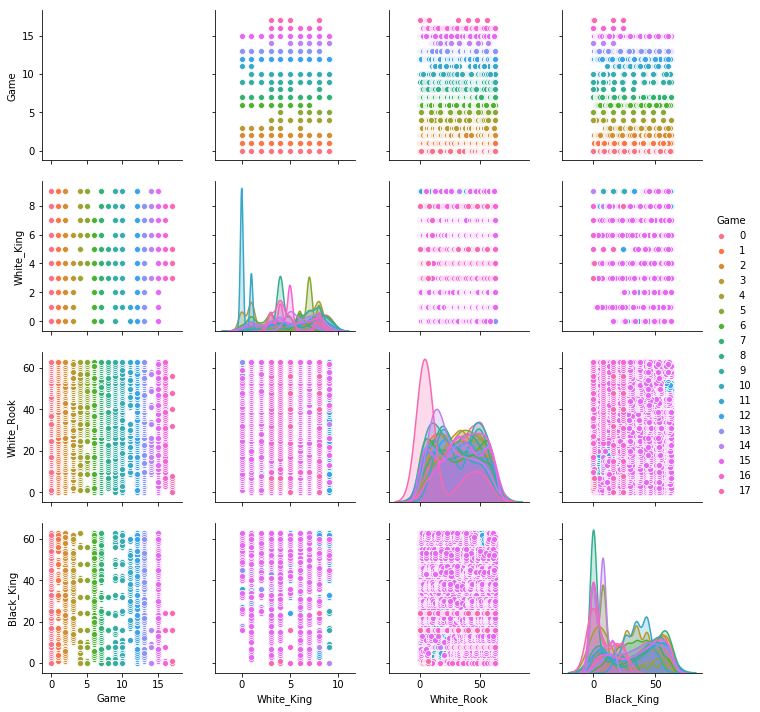

In [10]:
# JupyterLab で実行する際は、この行を書くことで描画できるようになります。
%matplotlib inline

sns.pairplot(df, hue='Game')

In [11]:
X=df.loc[:,['White_King','White_Rook','Black_King']]
y=df.loc[:,'Game']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, train_size = 0.6, 
                                                    shuffle = True)

In [13]:
clf = SVC(C=10.0,gamma='auto', kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
# predict label
y_pred = clf.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[1024,    4,    8,   10,    2,    1,   15,    4,    0,    3,    2,
           9,    5,   16,    3,    9,    2,    0],
       [  16,  375,   16,    1,   15,    8,    4,   65,    1,   34,   10,
           0,   23,    2,    1,    4,    1,    0],
       [  12,   19,  685,    7,    7,    0,   27,   45,    0,    9,    1,
           0,   82,   73,    0,  150,    0,    0],
       [  23,    0,   10,  571,    0,    0,  233,    1,    0,    0,    0,
          34,    1,   28,    0,    9,    0,    0],
       [   4,   10,    6,    0,  102,   18,    0,    5,    0,   13,   22,
           0,    3,    2,    4,    0,    2,    0],
       [   4,    3,    6,    0,   14,   41,    0,    1,    0,    2,    7,
           0,    0,    0,    2,    1,    0,    0],
       [  25,    7,   44,  166,    2,    0, 1243,    6,    0,    1,    8,
           4,   21,  239,    0,   86,    0,    0],
       [  10,   83,   51,    1,    2,    2,    3,  408,    2,    7,   14,
           1,   57,   14,    0,   19,    0,    0],


In [16]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.623897353648757


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# 交差検証
scores = cross_val_score(clf, X, y,cv=5)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.23220641 0.30739092 0.26341116 0.19122369 0.20003569]
Average score: 0.238853571447018


In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1117
           1       0.57      0.65      0.61       576
           2       0.52      0.61      0.56      1117
           3       0.68      0.63      0.65       910
           4       0.50      0.53      0.52       191
           5       0.51      0.51      0.51        81
           6       0.64      0.67      0.66      1852
           7       0.61      0.61      0.61       674
           8       0.47      0.50      0.48        28
           9       0.52      0.44      0.48       279
          10       0.50      0.47      0.48       227
          11       0.64      0.62      0.63       150
          12       0.59      0.53      0.56       787
          13       0.61      0.55      0.58      1692
          14       0.48      0.45      0.47        33
          15       0.59      0.57      0.58      1392
          16       0.78      0.54      0.64       107
          17       0.57    

In [18]:
odds = np.exp(clf.coef_).flatten()
odds_df = pd.DataFrame([df.columns, odds], index=['features', 'odds']).T

AttributeError: coef_ is only available when using a linear kernel

In [ ]:
plt.figure(dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()

In [ ]:
coef_df = pd.DataFrame([df.columns,
                        clf.coef_.flatten()], index=['features', 'coef']).T

In [ ]:
plt.figure(dpi=100)
sns.barplot(x=coef_df['coef'], y=coef_df['features'])
plt.tight_layout()